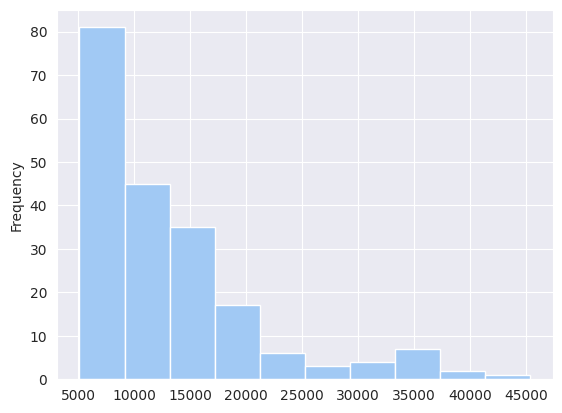

             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('automobile.csv')


# print(df.head(4))  # prime 4 righe
# print(df.tail(4))  # ultime 4 righe

# print(df.shape)
# print(df.info)
# print(df.columns.tolist())
# print(df.dtypes)

df_describe_1 = df.describe()
df_describe_2 = df.describe(include='object')

# %% missing data

df.replace("?", np.nan, inplace=True)

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']] = imputer.fit_transform(df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']])

# print(df['num-of-doors'].value_counts())
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

df.dropna(axis=0, inplace=True, subset=['price'])

missing_data = df.isnull()

for column in missing_data.columns:
    n_missing = sum(missing_data[column])
    if n_missing > 0:
        print(f"{column}: {n_missing}/{missing_data.shape[0]} mancanti.")

# %% grafici

df['price'] = df['price'].astype(float)
df['price'].plot(kind='hist')
plt.show()

# sns.regplot(data=df, x='engine-size', y='price')
# plt.show()

print(df[['engine-size', 'price']].corr())

df_corr = df.corr(numeric_only=True)


Country: 1/10 dati mancanti.
Age: 1/10 dati mancanti.
Salary: 1/10 dati mancanti.


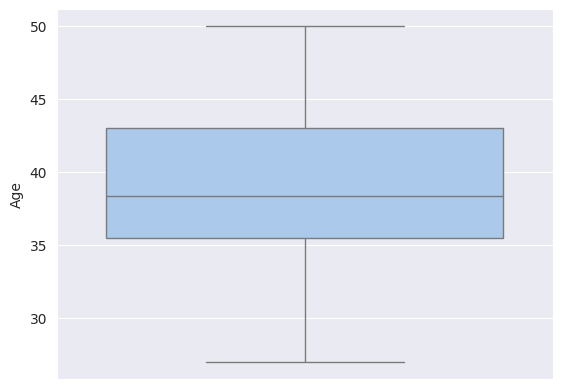

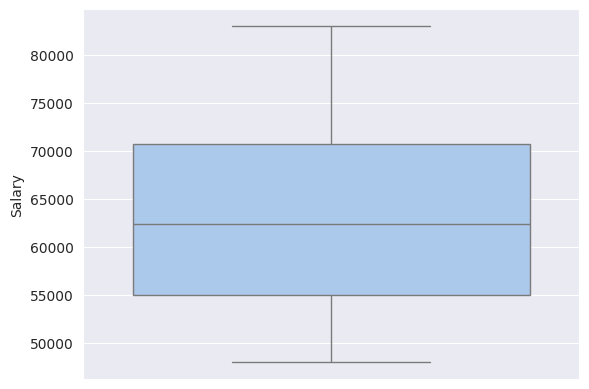

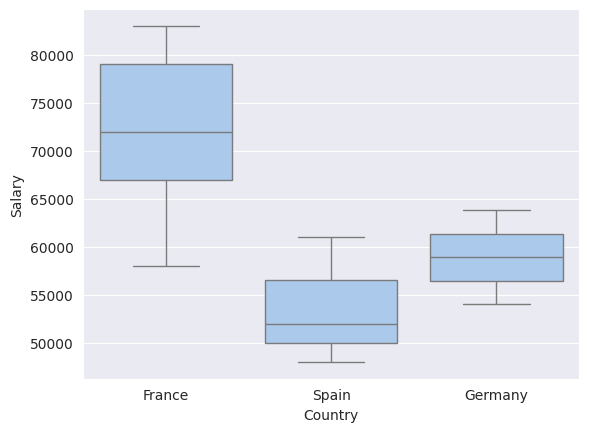

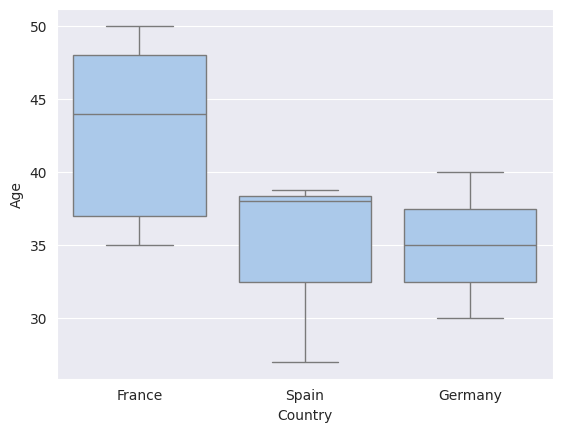

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('pastel')

df = pd.read_csv('data_preproc.csv')

# %% Missing data: identificazione

df.replace("?", np.nan, inplace=True)  # sostituiamo il ?

missing_data = df.isnull()  # ricaviamo i nan nel dataframe

for column in missing_data.columns:
    n_missing = sum(missing_data[column])
    if n_missing > 0:
        print(f"{column}: {n_missing}/{missing_data.shape[0]} dati mancanti.")

# %% Missing data: gestione

# eliminazione dell'osservazione
df_del_row = df.copy(deep=True)
df_del_row.dropna(axis=0, inplace=True)
df_del_row.reset_index(inplace=True, drop=True)

# eliminazione della feature
df_del_col = df.copy(deep=True)
df_del_col.dropna(axis=1, inplace=True)

# sostituzione: dati numerici
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  # median, constant, most_frequent
df[['Age', 'Salary']] = imputer.fit_transform(df[['Age', 'Salary']])

# sostituzione: dati non numerici
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['Country']] = imputer.fit_transform(df[['Country']])

# %% Outlier

sns.boxplot(data=df, y='Age')
plt.show()

sns.boxplot(data=df, y='Salary')
plt.show()

sns.boxplot(data=df, y='Salary', x='Country')
plt.show()

sns.boxplot(data=df, y='Age', x='Country')
plt.show()

# %% Data encoding

# label encoding
label_encoder = LabelEncoder()
df_encoded_label = df.copy(deep=True)
df_encoded_label['Country'] = label_encoder.fit_transform(df_encoded_label['Country'])

# one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
df_encoded_one = ct.fit_transform(df)
df_encoded_one = pd.DataFrame(df_encoded_one)

df_encoded_one.columns = ['France', 'Germany', 'Spain', 'Age', 'Salary', 'Purchased']


================================================================================

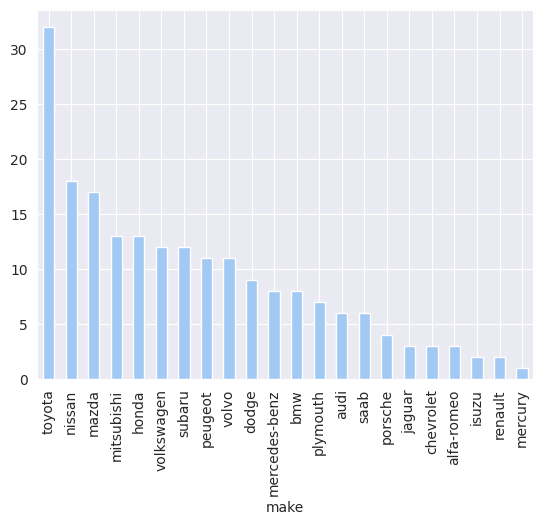

/tmp/ipykernel_10829/3920776579.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


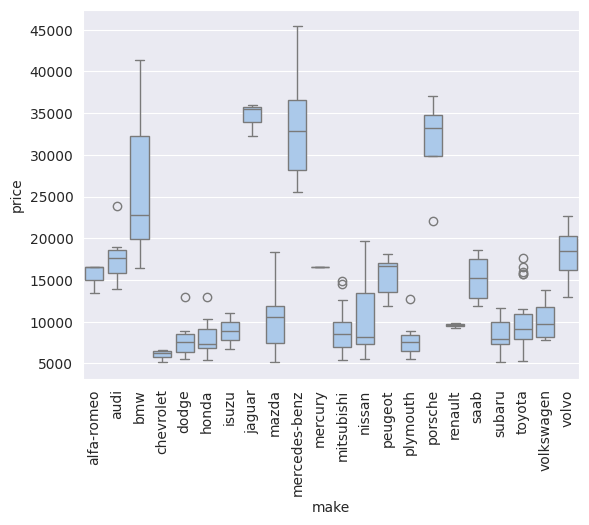

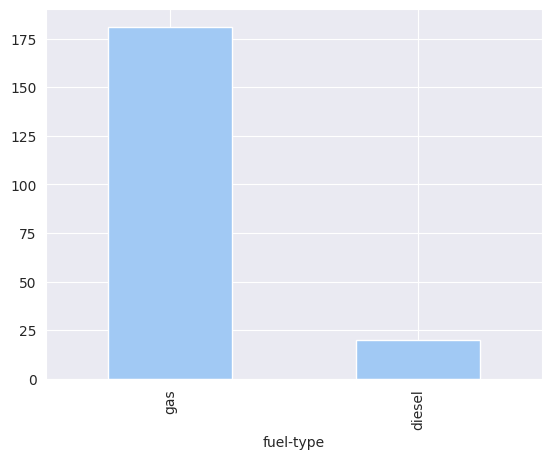

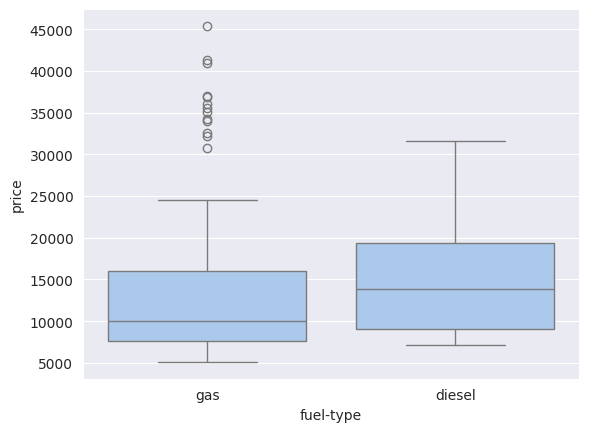

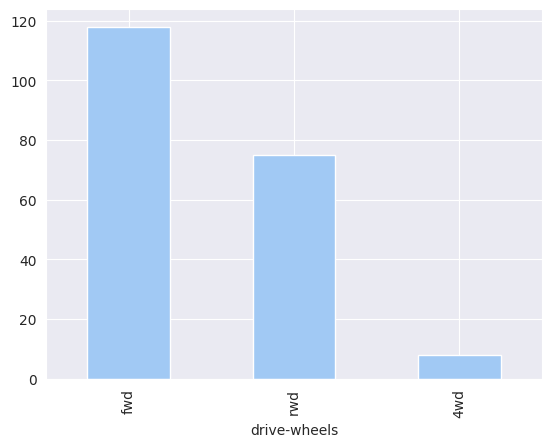

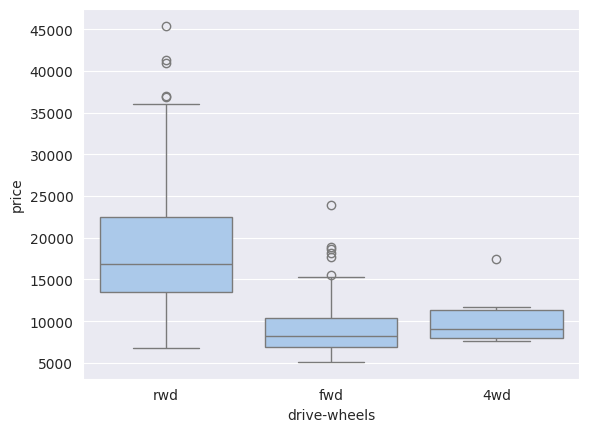

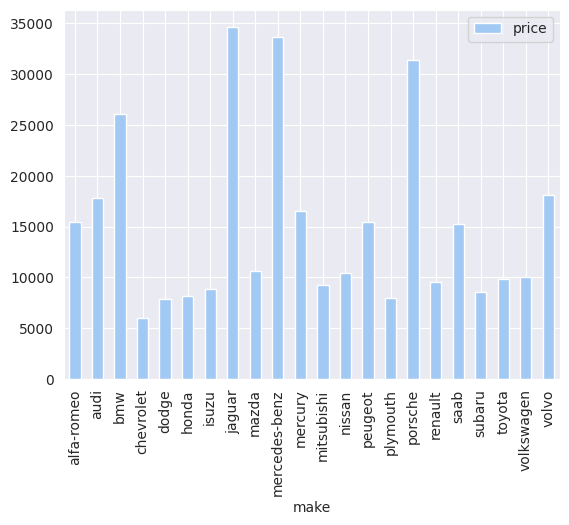

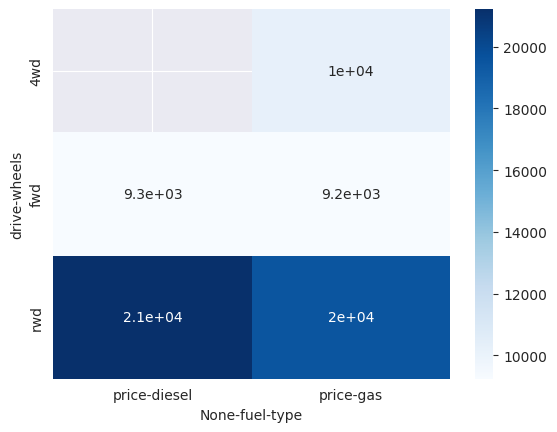

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split  # holdout validation
from sklearn.model_selection import cross_val_predict  # kfold validation
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


sns.set_style('darkgrid')
sns.set_palette('pastel')

df = pd.read_csv('automobile.csv')

# %% Data cleaning: errori nei dati

# print(df['make'].unique())
df['make'].replace('alfa-romero', 'alfa-romeo', inplace=True)
df['make'].replace('peugot', 'peugeot', inplace=True)
# print(df['make'].unique())

# print(df['num-of-doors'].unique())

# %% Data cleaning: missing data

df.replace('?', np.nan, inplace=True)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']] = imputer.fit_transform(df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['num-of-doors']] = imputer.fit_transform(df[['num-of-doors']])

df.dropna(subset=['price'], axis=0, inplace=True)

# missing_data = df.isnull()
# for column in missing_data.columns:
#     n_missing = sum(missing_data[column])
#     if n_missing > 0:
#         print(f"{column}: {n_missing}/{missing_data.shape[0]}")

# %% Data transformation: format

# print(df.dtypes)
df['price'] = df['price'].astype(float)

df['city-kml'] = df['city-mpg'] * 0.425144
df['highway-kml'] = df['highway-mpg'] * 0.425144

del df['city-mpg']
del df['highway-mpg']

df = df[[col for col in df.columns if col != 'price'] + ['price']]

# %% EDA

# # Variabile dipendente
# df['price'].plot(kind='hist')
# plt.show()

# df['price'].plot(kind='density')
# plt.show()

# sns.boxplot(data=df, y='price')
# plt.show()

# print(df['price'].describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 1]))



# Feature categoriche
#====================================================================================

df['make'].value_counts().plot(kind='bar')
plt.show()

ax = sns.boxplot(data=df, x='make', y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

df['fuel-type'].value_counts().plot(kind='bar')
plt.show()

sns.boxplot(data=df, x='fuel-type', y='price')
plt.show()

df['drive-wheels'].value_counts().plot(kind='bar')
plt.show()

sns.boxplot(data=df, x='drive-wheels', y='price')
plt.show()

df_group = df[['make', 'price']].groupby(['make'], as_index=False).mean()
df_group.plot(kind='bar', x='make')
plt.show()

df_group = df[['drive-wheels', 'fuel-type', 'price']].groupby(['drive-wheels', 'fuel-type'], as_index=False).mean()
df_group = df_group.pivot(index='drive-wheels', columns='fuel-type')

sns.heatmap(df_group, cmap='Blues', annot=True)
plt.show()

#====================================================================================

# %% Regressione lineare semplice: hold out

# df_corr = df.corr(numeric_only=True)

# df_reg = df[['engine-size', 'price']]

# # Training/test split
# X = df_reg.iloc[:, :-1]
# y = df_reg.iloc[:, -1]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # addestramento del regressore
# regressor = LinearRegression()

# regressor.fit(X_train, y_train)

# # predizioni
# y_hat = regressor.predict(X_test)

# # prestazioni
# # sns.regplot(data=df, x='engine-size', y='price')
# # plt.show()

# residuals = y_test-y_hat
# residuals.plot(kind='density')
# plt.show()

# mae = mean_absolute_error(y_test, y_hat)
# print(f"MAE = {mae}")

# mse = mean_squared_error(y_test, y_hat)
# print(f"MSE = {mse}")
# print(f"RMSE = {math.sqrt(mse)}")

# r2 = r2_score(y_test, y_hat)
# print(f"R2 = {r2}")

# # %% Regressione lineare semplice: kfold cross-validation

# df_reg = df[['horsepower', 'price']]

# # Training/test split
# X = df_reg.iloc[:, :-1]
# y = df_reg.iloc[:, -1]

# regressor = LinearRegression()

# # addestramento e predizioni
# y_hat = cross_val_predict(regressor, X, y, cv=5)

# mae = mean_absolute_error(y, y_hat)
# print(f"MAE = {mae}")

# mse = mean_squared_error(y, y_hat)
# print(f"MSE = {mse}")
# print(f"RMSE = {math.sqrt(mse)}")

# r2 = r2_score(y, y_hat)
# print(f"R2 = {r2}")

# # %% Regressione lineare multiple: kfold cross-validation

# df_reg = df[['width', 'curb-weight', 'engine-size', 'horsepower', 'city-kml', 'price']]

# # Training/test split
# X = df_reg.iloc[:, :-1]
# y = df_reg.iloc[:, -1]

# regressor = LinearRegression()

# # addestramento e predizioni
# y_hat = cross_val_predict(regressor, X, y, cv=5)

# mae = mean_absolute_error(y, y_hat)
# print(f"MAE = {mae}")

# mse = mean_squared_error(y, y_hat)
# print(f"MSE = {mse}")
# print(f"RMSE = {math.sqrt(mse)}")

# r2 = r2_score(y, y_hat)
# print(f"R2 = {r2}")

# r2_adj = 1 - (1-r2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
# print(f"R2-adjusted = {r2_adj}")

